In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.image as implt
%matplotlib inline

In [ ]:
!pip install kaggle

In [ ]:


!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d slothkong/10-monkey-species

 97% 533M/547M [00:06<00:00, 109MB/s] 
100% 547M/547M [00:06<00:00, 89.9MB/s]


In [ ]:
!unzip 10-monkey-species.zip

Archive:  10-monkey-species.zip
  inflating: monkey_labels.txt       
  inflating: training/training/n0/n0018.jpg  
  inflating: training/training/n0/n0019.jpg  
  inflating: training/training/n0/n0020.jpg  
  inflating: training/training/n0/n0021.jpg  
  inflating: training/training/n0/n0022.jpg  
  inflating: training/training/n0/n0023.jpg  
  inflating: training/training/n0/n0024.jpg  
  inflating: training/training/n0/n0025.jpg  
  inflating: training/training/n0/n0026.jpg  
  inflating: training/training/n0/n0027.jpg  
  inflating: training/training/n0/n0028.jpg  
  inflating: training/training/n0/n0029.jpg  
  inflating: training/training/n0/n0030.jpg  
  inflating: training/training/n0/n0031.jpg  
  inflating: training/training/n0/n0032.jpg  
  inflating: training/training/n0/n0033.jpg  
  inflating: training/training/n0/n0034.jpg  
  inflating: training/training/n0/n0035.jpg  
  inflating: training/training/n0/n0036.jpg  
  inflating: training/training/n0/n0037.jpg  
  inflatin

In [ ]:
import os

In [ ]:
images_dict={}
for i in range(10):
  no_cat=os.listdir(path='/content/training/training/n'+f'{i}')
  images_dict[i]=len(no_cat)


In [ ]:
images_dict

{0: 105,
 1: 111,
 2: 110,
 3: 122,
 4: 105,
 5: 113,
 6: 106,
 7: 114,
 8: 106,
 9: 106}

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,GlobalAveragePooling2D,Input,BatchNormalization,ReLU,Dropout

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(rotation_range=0.3,width_shift_range=0.2,height_shift_range=0.2,brightness_range=(0.4,.7),shear_range=0.2,zoom_range=0.2,horizontal_flip=True,rescale=1/255.0)
valid_gen=ImageDataGenerator(rescale=1/255.0)

In [ ]:
train=train_gen.flow_from_directory('/content/training/training',target_size=(256,256),class_mode='categorical')
valid=valid_gen.flow_from_directory('/content/validation/validation',target_size=(256,256),class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [ ]:
ins=Input(shape=(256,256,3))
x=Conv2D(30,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu')(ins)
x=Conv2D(60,kernel_size=(3,3))(x)
x=BatchNormalization()(x)
x=ReLU()(x)
x=MaxPooling2D()(x)
x=Dropout(0.2)(x)
x=Conv2D(90,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu')(x)
x=Conv2D(110,kernel_size=(3,3))(x)
x=BatchNormalization()(x)
x=ReLU()(x)
x=MaxPooling2D()(x)
x=Dropout(0.1)(x)
x=Conv2D(90,kernel_size=(3,3),kernel_initializer='he_normal',activation='relu')(x)
x=Conv2D(110,kernel_size=(3,3))(x)
x=BatchNormalization()(x)
x=ReLU()(x)
x=MaxPooling2D()(x)
x=GlobalAveragePooling2D()(x)
x=Dense(70,activation='relu',kernel_initializer='he_normal')(x)
x=Dense(45,activation='relu',kernel_initializer='he_normal')(x)
x=Dropout(0.1)(x)
x=Dense(25,activation='relu',kernel_initializer='he_normal')(x)
outs=Dense(10,activation='softmax')(x)

In [ ]:
model=Model(inputs=ins,outputs=outs)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')
early=EarlyStopping(patience=20,monitor='val_loss',mode='min')
model.fit_generator(train,validation_data=valid,epochs=70,callbacks=[early])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/70
35/35 [==============================] - 62s 2s/step - loss: 2.2152 - accuracy: 0.1885 - val_loss: 2.3391 - val_accuracy: 0.1875
Epoch 2/70
35/35 [==============================] - 61s 2s/step - loss: 2.0102 - accuracy: 0.2969 - val_loss: 2.2021 - val_accuracy: 0.1691
Epoch 3/70
35/35 [==============================] - 61s 2s/step - loss: 1.8720 - accuracy: 0.3388 - val_loss: 2.6357 - val_accuracy: 0.1066
Epoch 4/70
35/35 [==============================] - 60s 2s/step - loss: 1.7768 - accuracy: 0.3752 - val_loss: 2.3458 - val_accuracy: 0.2206
Epoch 5/70
35/35 [==============================] - 60s 2s/step - loss: 1.6401 - accuracy: 0.4144 - val_loss: 2.6394 - val_accuracy: 0.2132
Epoch 6/70
35/35 [==============================] - 61s 2s/step - loss: 1.6096 - accuracy: 0.4117 - val_loss: 1.7986 - val_accuracy: 0.3713
Epoch 7/70
35/35 [==============================] - 62s 2s/step - loss: 1.5137 - acc

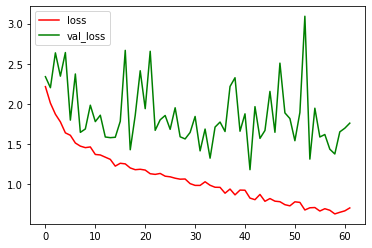

In [ ]:
plt.plot(model.history.history.get('loss'),label='loss',color='red')
plt.plot(model.history.history.get('val_loss'),label='val_loss',color='green')
plt.legend(loc=0)
plt.show()


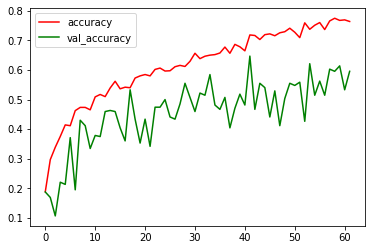

In [ ]:
plt.plot(model.history.history.get('accuracy'),label='accuracy',color='red')
plt.plot(model.history.history.get('val_accuracy'),label='val_accuracy',color='green')
plt.legend(loc=0)
plt.show()

In [ ]:
pre_model=InceptionV3(include_top=False,input_shape=(256,256,3))
for layer in pre_model.layers:
  layer.trainable = False


87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
pre_model.summary(
    
)

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 127, 127, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 127, 127, 32) 96          conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization_14[0][0]     
_______________________________________________________________________________________

In [ ]:
pre_out=pre_model.get_layer(name='mixed10').output
x=GlobalAveragePooling2D()(pre_out)
x=Dense(1500,activation='relu',kernel_initializer='he_normal')(x)
x=Dense(700)(x)
x=BatchNormalization()(x)
x=ReLU()(x)
x=Dense(300,activation='relu',kernel_initializer='he_normal')(x)
x=Dense(100,activation='relu',kernel_initializer='he_normal')(x)
x=Dense(50,activation='relu',kernel_initializer='he_normal')(x)
x=Dense(25,activation='relu',kernel_initializer='he_normal')(x)
outs=Dense(10,activation='softmax')(x)



In [ ]:
import tensorflow as tf

In [ ]:
class end_process(tf.keras.callbacks.Callback):
  def end(self,epoch,logs={}):
    if logs.get('accuracy')>0.995:
      self.model.stop_training = True
stop=end_process()

In [ ]:
new_model=Model(inputs=pre_model.input,outputs=outs)
new_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')
early=EarlyStopping(patience=20,monitor='val_loss',mode='min')
new_model.fit(train,validation_data=valid,epochs=25,callbacks=[early,stop])

Epoch 1/25
35/35 [==============================] - 57s 2s/step - loss: 0.5465 - accuracy: 0.8397 - val_loss: 1.1796 - val_accuracy: 0.7169
Epoch 2/25
35/35 [==============================] - 56s 2s/step - loss: 0.2016 - accuracy: 0.9353 - val_loss: 0.6120 - val_accuracy: 0.9081
Epoch 3/25
35/35 [==============================] - 56s 2s/step - loss: 0.1610 - accuracy: 0.9508 - val_loss: 0.3529 - val_accuracy: 0.8971
Epoch 4/25
35/35 [==============================] - 56s 2s/step - loss: 0.1630 - accuracy: 0.9554 - val_loss: 0.3208 - val_accuracy: 0.8824
Epoch 5/25
35/35 [==============================] - 55s 2s/step - loss: 0.1340 - accuracy: 0.9599 - val_loss: 0.8867 - val_accuracy: 0.8051
Epoch 6/25
35/35 [==============================] - 56s 2s/step - loss: 0.1135 - accuracy: 0.9772 - val_loss: 0.2248 - val_accuracy: 0.9522
Epoch 7/25
35/35 [==============================] - 56s 2s/step - loss: 0.0927 - accuracy: 0.9672 - val_loss: 0.0866 - val_accuracy: 0.9706
Epoch 8/25
35/35 [==

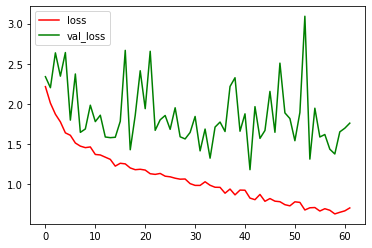

In [ ]:
plt.plot(model.history.history.get('loss'),label='loss',color='red')
plt.plot(model.history.history.get('val_loss'),label='val_loss',color='green')
plt.legend(loc=0)
plt.show()


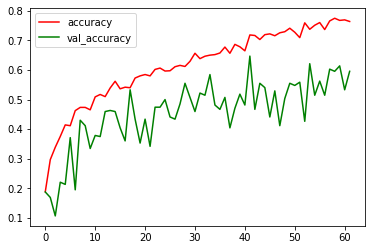

In [ ]:
plt.plot(model.history.history.get('accuracy'),label='accuracy',color='red')
plt.plot(model.history.history.get('val_accuracy'),label='val_accuracy',color='green')
plt.legend(loc=0)
plt.show()

In [ ]:
from google.colab import files
files.upload()

Saving Alouattapalliata1.jpg to Alouattapalliata1.jpg


{'Alouattapalliata1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x01\x83\x01\x11\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\x

In [ ]:
image_path='/content/Alouattapalliata1.jpg'
img_load=load_img(image_path,target_size=(256,256))
img=img_to_array(img_load)
img=img/255.0
img=np.expand_dims(img,axis=0)
predicts=model.predict(img)

In [ ]:
predicts.shape

(1, 10)

In [ ]:
final_preds=np.argmax(predicts,axis=-1)

In [ ]:
final_preds

array([8])

In [ ]:
labels=pd.read_csv('/content/monkey_labels.txt')

In [ ]:
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


It some times predicting correct and sometime not predicting correctly because I took somewhat similar images of one breed with other and their it failed. So, we are lacking the different kinds of images of one kind of monkeys in the dataset.